In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import algorithm
from sklearn import linear_model,preprocessing,tree,model_selection,svm
import sklearn.naive_bayes 
import seaborn as sb
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv(r'C:\Users\ankit\OneDrive\Desktop\Python Classes\Python Project\GDRP\Students.CSV')

In [27]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [28]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


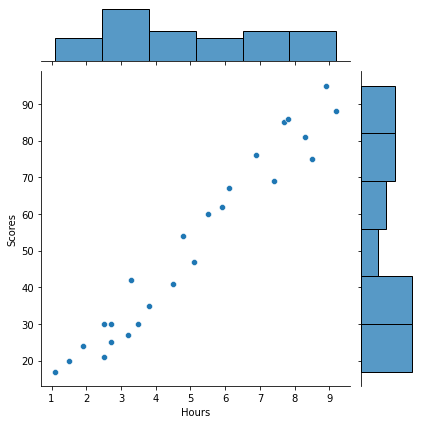

In [29]:
sns.jointplot(x='Hours',y='Scores',data=df)

<AxesSubplot:xlabel='Hours', ylabel='count'>

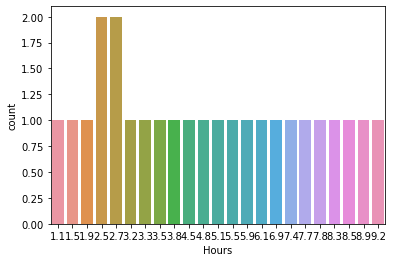

In [30]:
sns.countplot(x='Hours',data=df)

<AxesSubplot:xlabel='count', ylabel='Scores'>

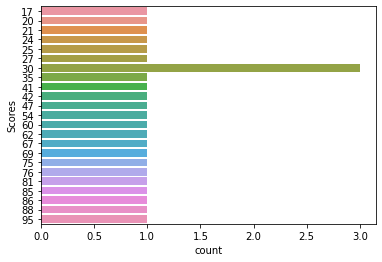

In [31]:
sns.countplot(y='Scores',data=df)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


99% and 1 % value of the confidence interval of the variables

In [33]:
np.percentile(df.Hours,[99])

array([9.128])

99% of Hours is 9.128

To locate the First value of the array 

In [38]:
uv=np.percentile(df.Hours,[99])[0]

The First value of the array for 99% confidence interval

In [39]:
uv

9.127999999999998

To identify the rows there the value of the Hours is more than 99% value of df.Hours

In [36]:
df[(df.Hours>uv)]

,Hours,Scores
6,9.2,88


So this is an outlier which can be capped ,but since the impact is not greater than 2 times I am not deleting this outlier

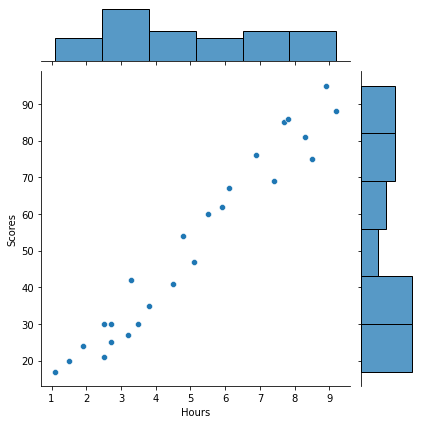

In [42]:
sns.jointplot(x='Hours',y='Scores',data=df)

To check any missing value we can use df.info() in our case both the vale is 25 so there are no missing value 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Correlation Matrix

In [44]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Here Scores is the dependent variable

Simple Linear Regression :-

In [46]:
import statsmodels.api as sn

In [ ]:
To create a variable X and to add the constant B0

In [47]:
X =sn.add_constant(df['Hours'])

c:\Users\ankit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


To fit the model-ols-ordinary least square

In [48]:
lm=sn.OLS(df['Scores'],X).fit()

In [50]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           9.13e-17
Time:                        18:04:43   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
y=df['Scores']

In [53]:
X=df[['Hours']]

In [54]:
lm2=LinearRegression()

In [55]:
lm2.fit(X,y)

LinearRegression()

In [56]:
lm2

LinearRegression()

In [57]:
print(lm2.intercept_,lm2.coef_)

2.48367340537321 [9.77580339]


B0=2.48 ,B1=9.77

In [59]:
lm2.predict(X)

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

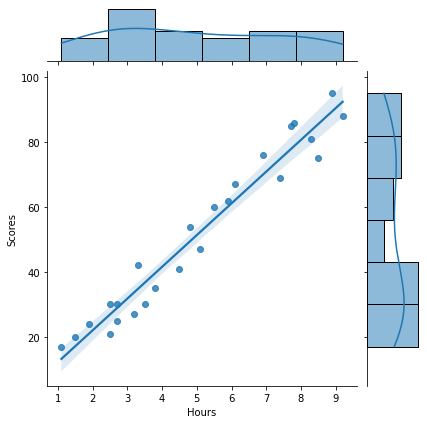

In [60]:
sns.jointplot(x=df['Hours'],y=df['Scores'], data=df,kind="reg")

Training error-Performance of model on the previously seen data 
Test error-Performance of model on the unseen data
Random division of data into two parts with the split of 80:20(Training :Test)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

random state is used to get the same training and test set =0

In [64]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


In [65]:
lm_a=LinearRegression()

In [66]:
lm_a.fit(X_train,y_train)

LinearRegression()

In [67]:
y_test_a=lm_a.predict(X_test)

In [68]:
y_train_a=lm_a.predict(X_train)

In [71]:
from sklearn.metrics import r2_score

In [72]:
r2_score(y_test,y_test_a)

0.9454906892105356

R square value for the test set is 0.94

In [73]:
r2_score(y_train,y_train_a)

0.9515510725211552

R square value for the test set is 0.95

In [75]:
# Comparing Actual vs Predicted
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_a})  


In [76]:
df_compare

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [100]:
regressor = LinearRegression()  

In [102]:
regressor.fit(X_test,y_test)

LinearRegression()

In [103]:
regressor.fit(X_train,y_train)

LinearRegression()

In [104]:

X_test2=9.25 # Testing data - In Hours
print(X_test2)


9.25


In [107]:
X_test2 =[[9.25]]
y_pred2 = regressor.predict(X_test2)
print('Number of total hours : {}'.format(X_test2))
print('Predicted Score : {}'.format(y_pred2[0]))

Number of total hours : [[9.25]]
Predicted Score : 93.69173248737538
